## AI Final Project (Data Notebook)

Yutai Li, Coco Yu

In [21]:
import os
import math
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [22]:
os.getcwd()

'/Users/yujiachen/Library/CloudStorage/OneDrive-TheUniversityofChicago/class notes_UChicago/MACS 31300/AI-Project'

In [23]:
face_df = pd.read_csv('icml_face_data.csv')
face_df.columns = ["emotion", "usage", "pixels"]
face_df.head()

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [24]:
face_df

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [25]:
face_df = face_df.drop_duplicates(subset="pixels", keep=False)

In [26]:
face_df.iloc[:,1].value_counts()

Training       26006
PrivateTest     3261
PublicTest      3251
Name: usage, dtype: int64

In [27]:
face_df['emotion'].value_counts()

3    8614
6    5916
4    5786
0    4583
2    4556
5    2669
1     394
Name: emotion, dtype: int64

In [28]:
# take out the usage column
face_df = face_df[['emotion', 'pixels']]
face_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [29]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

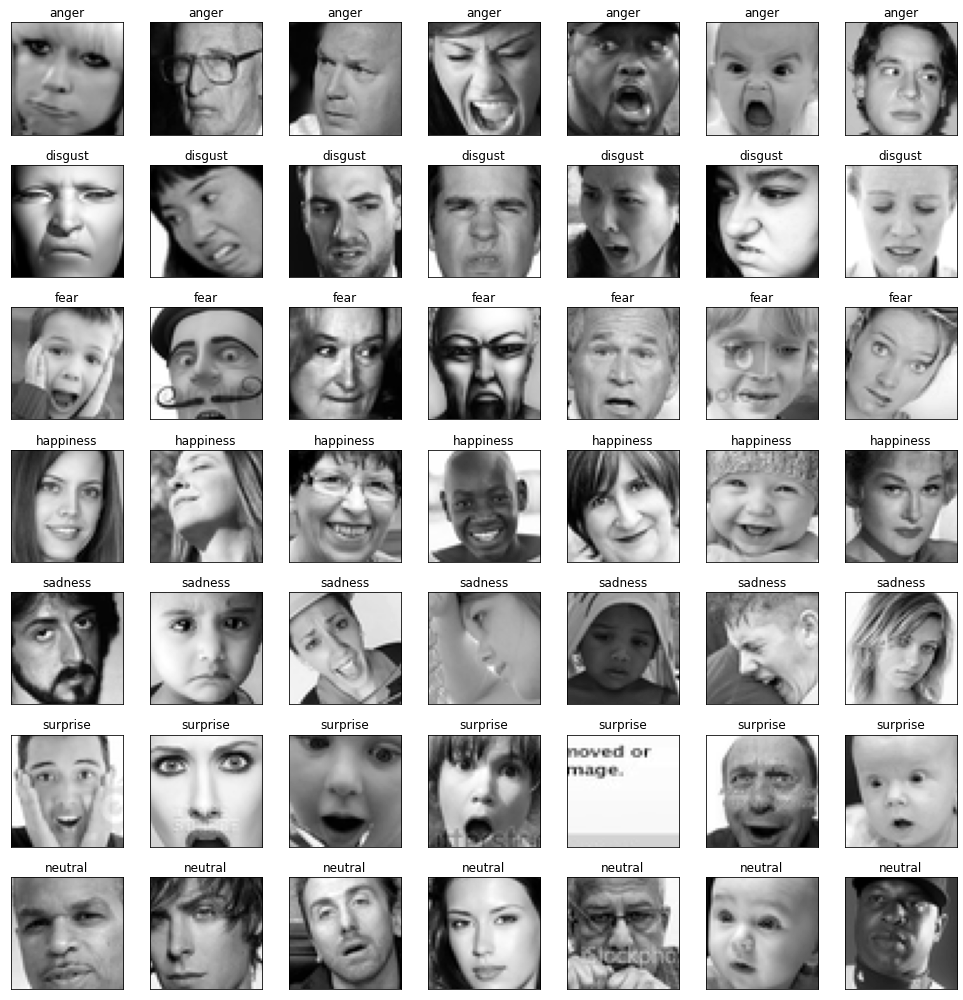

In [30]:
fig = pyplot.figure(1, (14, 14))

random.seed(0)
n = random.randint(0, high=547)
k = 0

for label in sorted(face_df.emotion.unique()):
    for j in range(7):
        px = face_df[face_df.emotion==label].pixels.iloc[n]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        n += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()